# Linear Regression with One Variable 

        y = mx + c

        - *Finding the line of best fit*

In [199]:
import kagglehub as kh
import pandas as pd
import matplotlib.pyplot as plt

In [200]:
# Load the dataset
data = kh.dataset_download("akshaysehgal/titanic-data-for-data-preprocessing")

In [201]:
df = pd.read_csv(data + "/titanic_data.csv")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
885,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
886,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
887,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [202]:
df[df.duplicated()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
47,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
76,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
77,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
87,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
95,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,0,3,male,26.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
875,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
876,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
882,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True


In [203]:
df.drop_duplicates(inplace=True)

In [204]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
885,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
886,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
887,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [205]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            105
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           580
embark_town      2
alive            0
alone            0
dtype: int64

In [206]:
df.dropna(inplace=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
870,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
877,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
885,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [207]:
data = [[3,5], [4,8], [2,10], [8,9], [5,10], [6,9]]
data

[[3, 5], [4, 8], [2, 10], [8, 9], [5, 10], [6, 9]]

In [208]:
x, y = zip(*data)
x, y

((3, 4, 2, 8, 5, 6), (5, 8, 10, 9, 10, 9))

In [209]:
#predicted y=mx+c
m, c= 0.75, 5
def y_pred(x):
    return [m*xi + c for xi in x]

In [210]:
def error(y):
    return sum([(yi - y_predi)**2 for yi, y_predi in zip(y, y_pred(x))]) / len(y)

In [211]:
print (y)
print (y_pred(x))
print (error(y))

(5, 8, 10, 9, 10, 9)
[7.25, 8.0, 6.5, 11.0, 8.75, 9.5]
3.8541666666666665


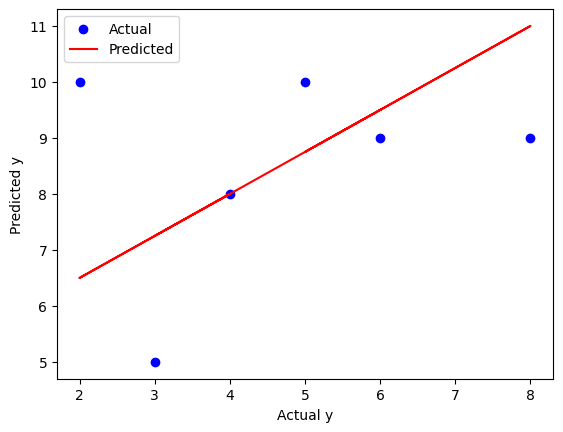

In [212]:
plt.scatter(x, y, color='blue', label='Actual')
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.plot(x, y_pred(x), color='red', label='Predicted')
plt.legend()
plt.show()